In [34]:
%matplotlib inline
from __future__ import division, print_function
from six import StringIO
import xml.etree.ElementTree as etree
import re

import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import requests

from svgpath2mpl import parse_path

In [35]:
from IPython.display import Image
Image(url='http://thenewcode.com/assets/images/thumbnails/homer-simpson.svg')

In [40]:
#r = requests.get('http://thenewcode.com/assets/images/thumbnails/homer-simpson.svg')
with open("img/mouse.svg", "r") as file:
    text = file.read()

tree = etree.parse(StringIO(text))
root = tree.getroot()
width = 2500#int(re.match(r'\d+', root.attrib['width']).group())
height = 2500#int(re.match(r'\d+', root.attrib['height']).group())
path_elems = root.findall('.//{http://www.w3.org/2000/svg}path')

In [41]:
paths = [parse_path(elem.attrib['d']) for elem in path_elems]
facecolors = [elem.attrib.get('fill', 'none') for elem in path_elems]
edgecolors = [elem.attrib.get('stroke', 'none') for elem in path_elems]
linewidths = [elem.attrib.get('stroke_width', 1) for elem in path_elems]
collection = mpl.collections.PathCollection(paths, 
                                      edgecolors=edgecolors, 
                                      linewidths=linewidths,
                                      facecolors=facecolors)

(2500.0, 0.0)

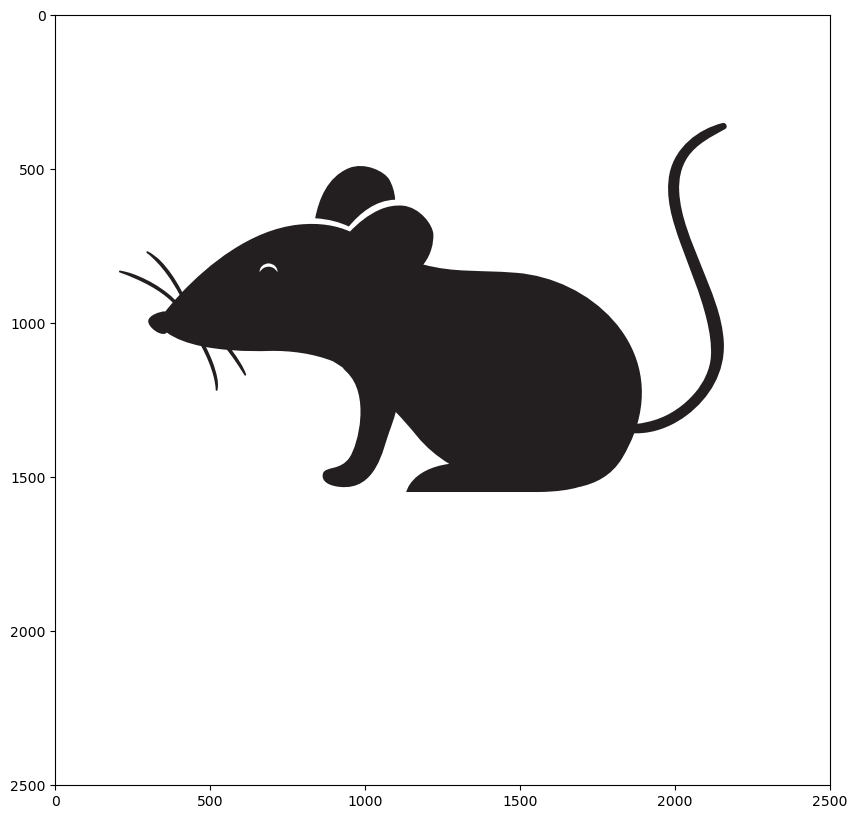

In [42]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111)
collection.set_transform(ax.transData)
ax.add_artist(collection)
ax.set_xlim([0, width])
ax.set_ylim([height, 0])